In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_excel(r"D:\Machine Learning\Decision Tree\Datasets\cars.xls")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [29]:
df.duplicated().sum()

0

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [31]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include = np.number).columns.tolist() #exclude = 'object'

print(cat_col)
print(num_col)

Index(['Make', 'Model', 'Trim', 'Type'], dtype='object')
['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


Price


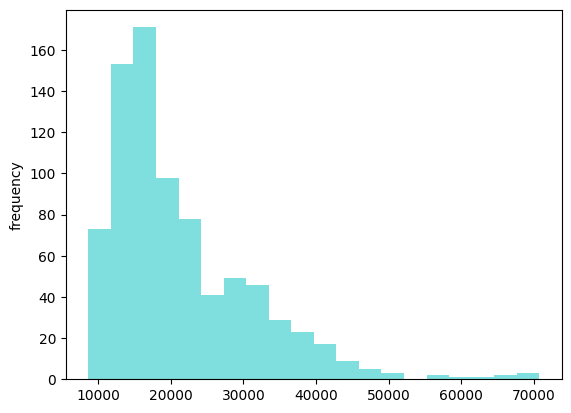

Mileage


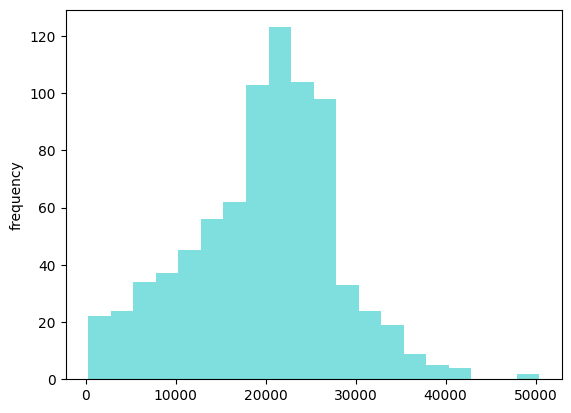

Cylinder


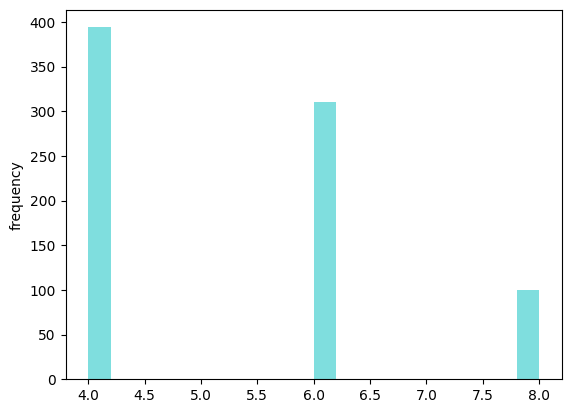

Liter


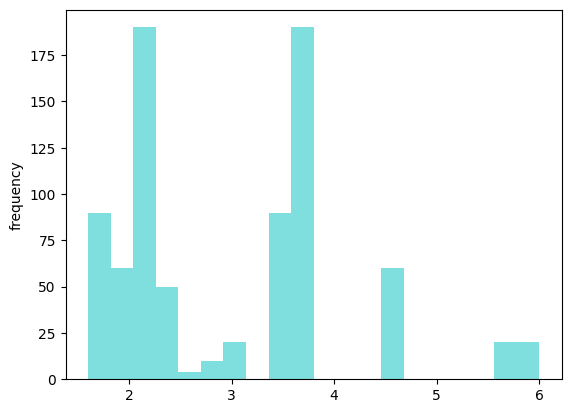

Doors


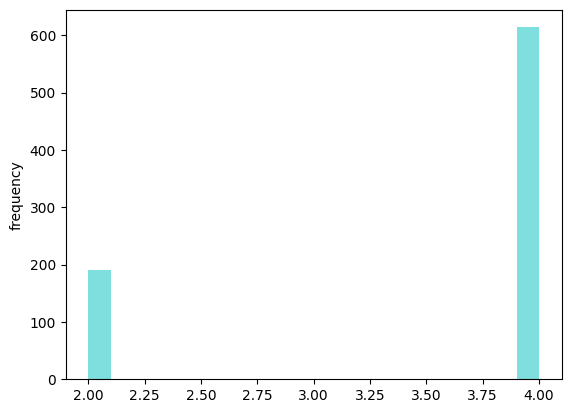

Cruise


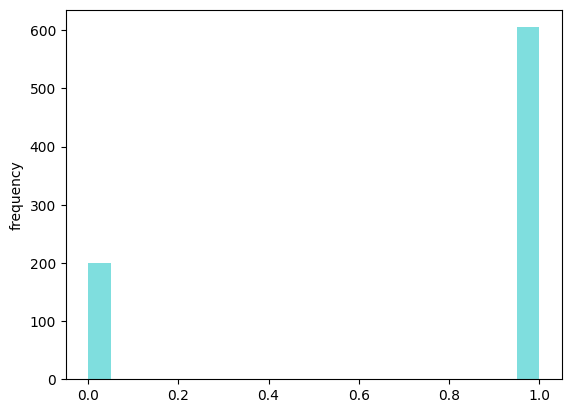

Sound


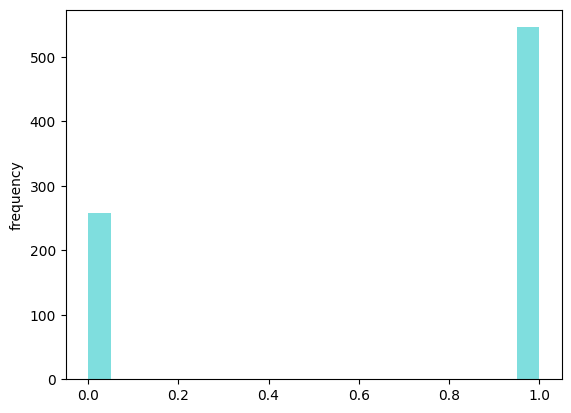

Leather


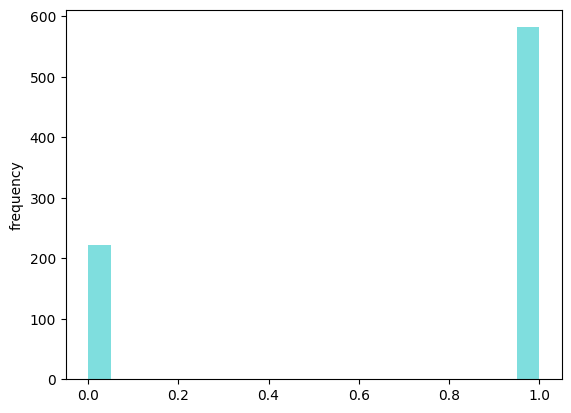

In [32]:
# Univeriate analysis
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha=0.5, bins=20, color='c') 
    plt.ylabel('frequency')
    plt.show()

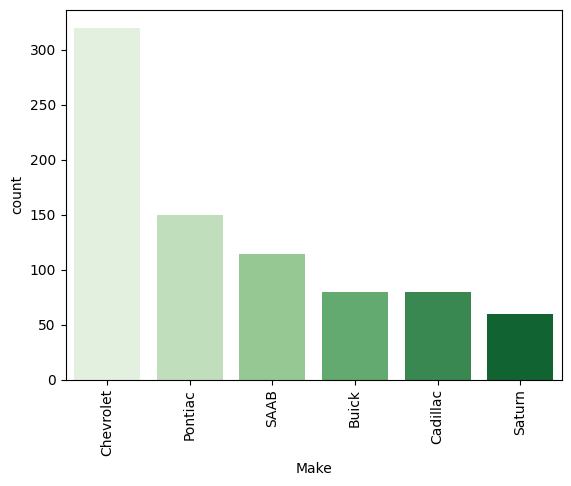

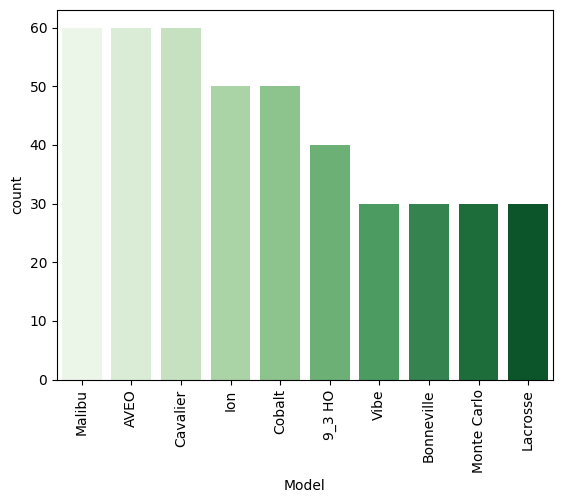

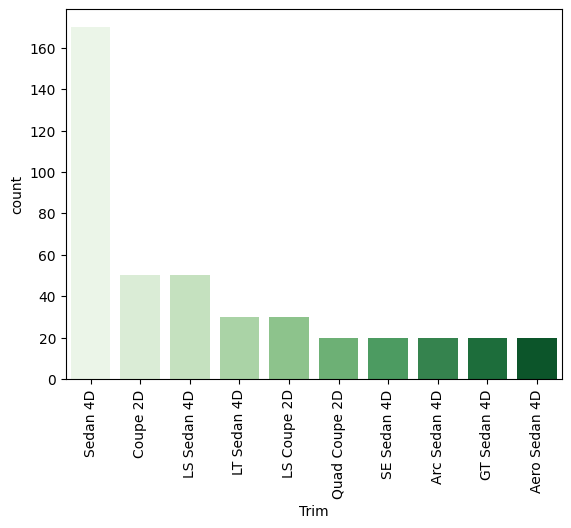

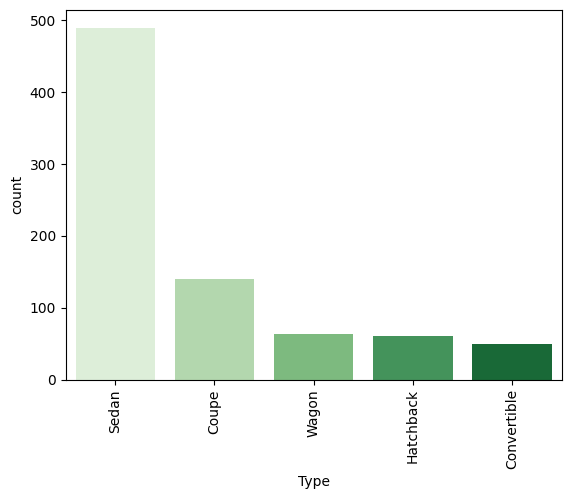

In [33]:
for col in cat_col:
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index, palette='Greens')
    plt.xticks(rotation=90)
    plt.show()

In [34]:
df['Doors'].value_counts()

Doors
4    614
2    190
Name: count, dtype: int64

In [35]:
X = df[['Mileage','Price']]
y = df['Doors']  # Assuming 'Price' is your target variable

In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Fit the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=42)

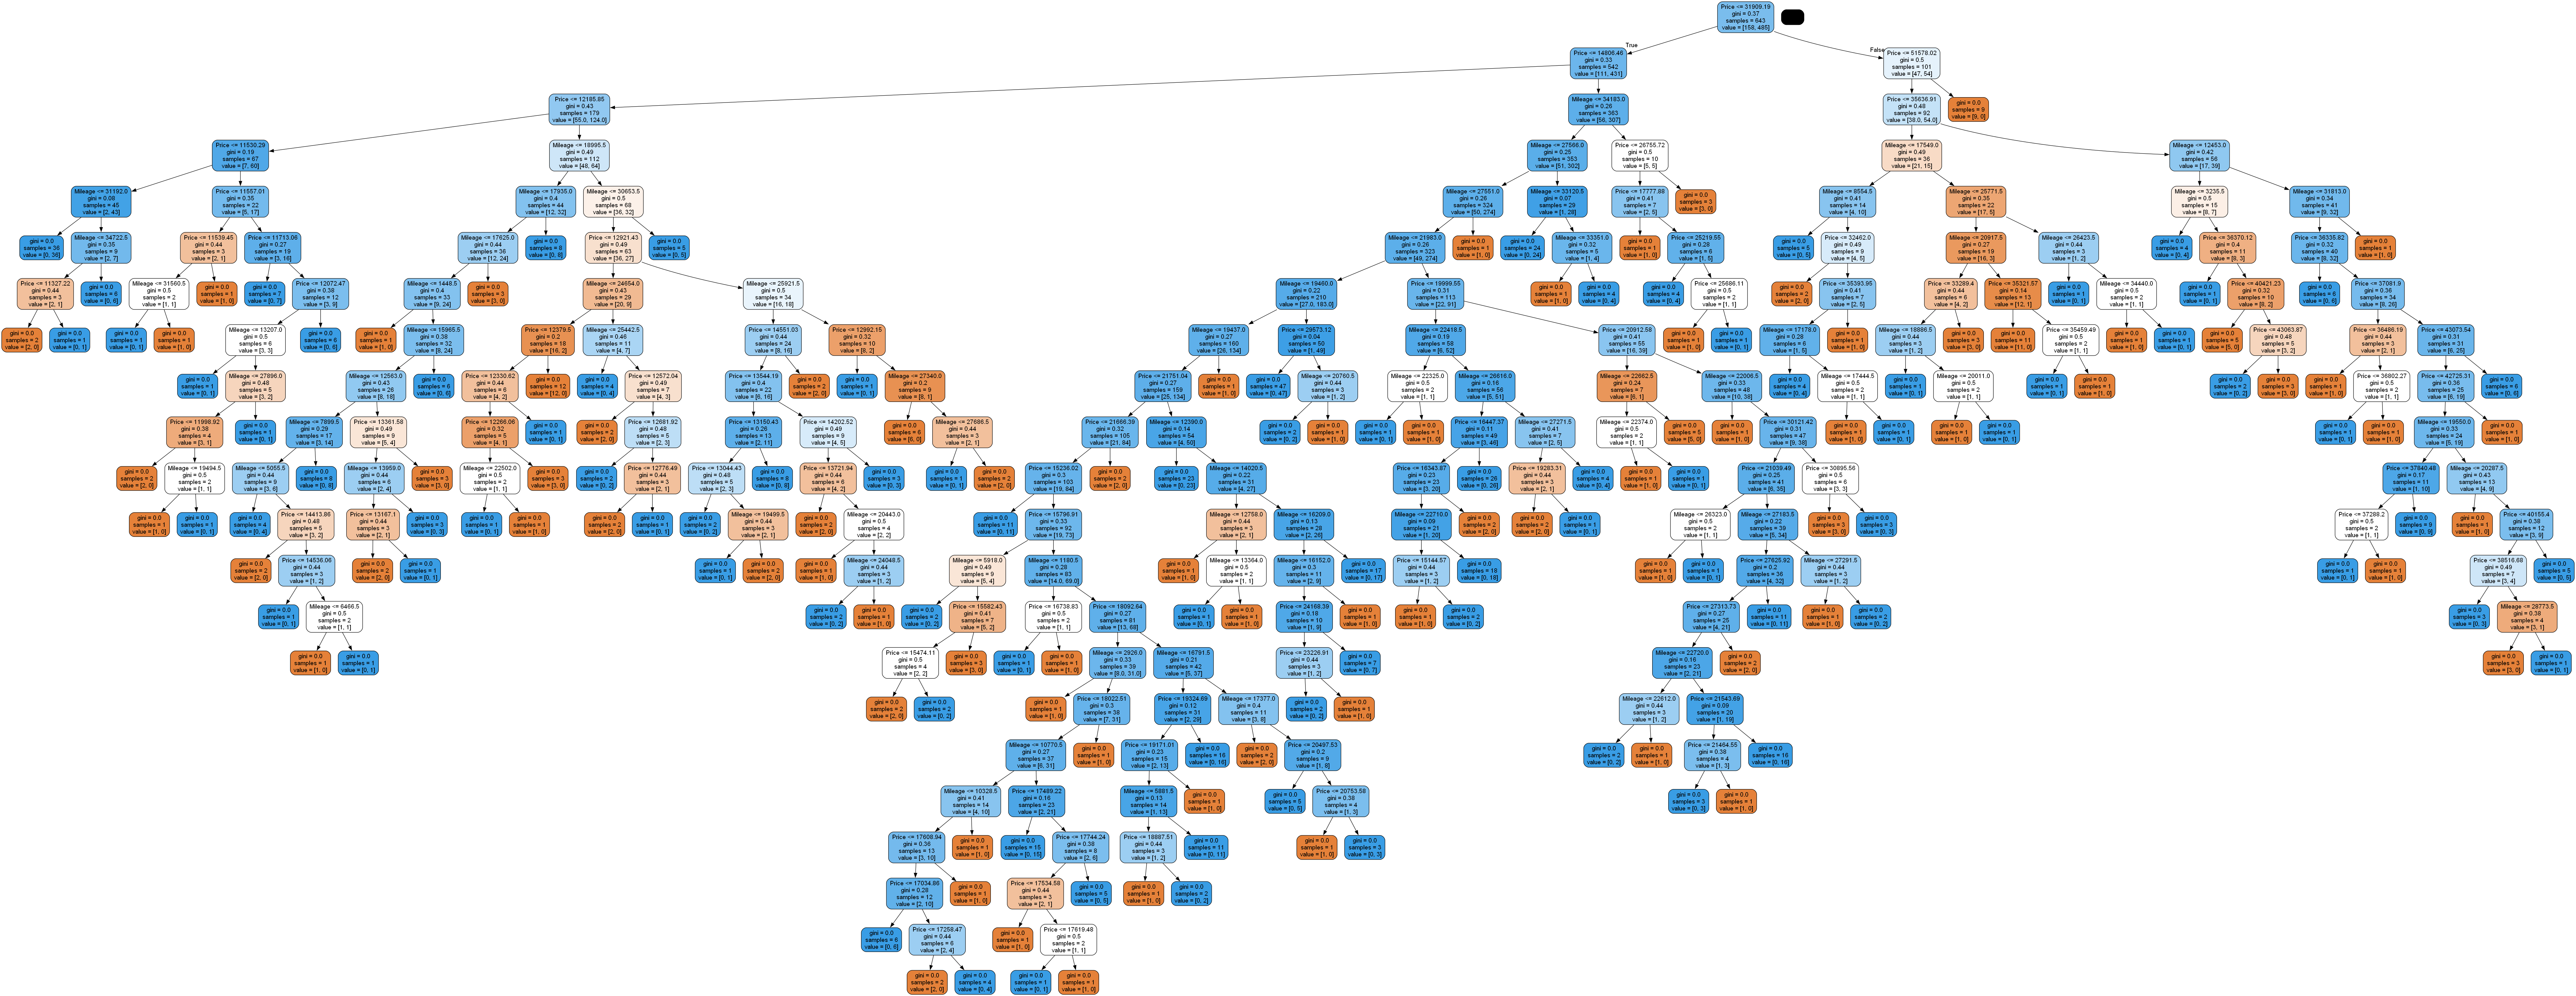

In [38]:
# Choose a tree from the random forest (e.g., the first tree)
#estimator = model.estimators_[1]

# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

In [39]:
y_pred = model.predict(X_test)
y_pred

array([4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4], dtype=int64)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7515527950310559
Classification Report:
               precision    recall  f1-score   support

           2       0.40      0.50      0.44        32
           4       0.87      0.81      0.84       129

    accuracy                           0.75       161
   macro avg       0.63      0.66      0.64       161
weighted avg       0.77      0.75      0.76       161

Confusion Matrix:
 [[ 16  16]
 [ 24 105]]


In [41]:
new = [[8222, 18000]]
y_pred = model.predict(new)
print(y_pred[0])

2


Train Accuracy
Test Accuracy
Classification Report
Confusion Matrix